<br>
<br>

# `#01: Gradient Boosting Classifier:`

<br>
<br>

[blog_link](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e/)


<br>
<br>



**Code Idea is that:** We are doing additive modeling. Why it's working? Becasue, here we make a big model combining mutiple small model.

<br>

```text
final_model,f(x) = f1(x) + f2(x) + f3(x) + f4(x)+...+fn(x)
```
- For Regression f1(x) is simply the mean.
- For Classification f1(x) is simply just log-of-odds means,

```text
ln(#count of 1 / #count of 0)
```

<br>

 f2(x) + f3(x) + f4(x)+...+fn(x) --> simply the decision tree. Where we DecisionTreeClassifier(max_depth=1) means  we will get High Bias model. We add multiple high bias model to get low bias and low variance model.

 <br>



In [1]:


import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

df


,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [5]:


# initial prediction, We are calculating the log of odds: ->
# we have total 5 ones
# we have total 2 zeros
df['pre1(log-odds)'] = np.log(5/3)
df



,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [6]:


# convert log odds to probability using sigmoid function : 1/(1+e^-x)
df['pre1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df



,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [7]:

# calculating residual for stage 1:
#
# residual-error = (actual - predicted_probabiilty)
#
df['res1'] = df['is_placed'] - df['pre1(probability)']
df



,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [9]:

#
# training the first decision tree,
# As though, we are doing classification problem but we are tranning a
# DecitionTreeRegressor() cause our residual is continous number.
#
from sklearn.tree import DecisionTreeRegressor

#
# max_leaf_nodes: split korar time e jodi sample or row jodi 3 ta thake
# then spliting off hoye jabe
#
reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)
reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)



DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

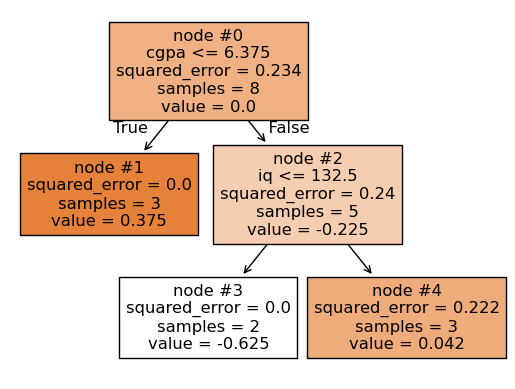

In [12]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


#
# The the output or value like value=0.375 is the probability. Now
# out task is find output of f(x) = f1(x) + f2(x)
# f1(x) is log-of-odds
# f2(x) is dt regressor output in probability
#
# Probelm is we can't add log-of-odds and probability
# So, From probability how to calcualte log-of-odds???
# log-of-odds = (summation_of(Residual) / summation_of(prev_prob * (1-prev_prob)))
#
#

plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()



In [13]:


# leaf_entry1 means split korar por kon node kon kon columns thakthese.
# node 3 te: 1st row and last row ase . ei dui ta diye amara
# Uprer cell e thaka formula diye log-of-odd calculation korbo.
#
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [16]:

#
# output of the model f(X)  = f1(X) + f2(x)
#
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)





In [17]:


df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs)



In [18]:

#
# now conver the log-odds into probability again: using sigmoid fn
#
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [19]:

#
# calculate the residuals: actual - pred
#
df['res2'] = df['is_placed'] - df['pre2(probability)']
df


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


In [20]:

#
# repeat the same things, for others models
#
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)
reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)




DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

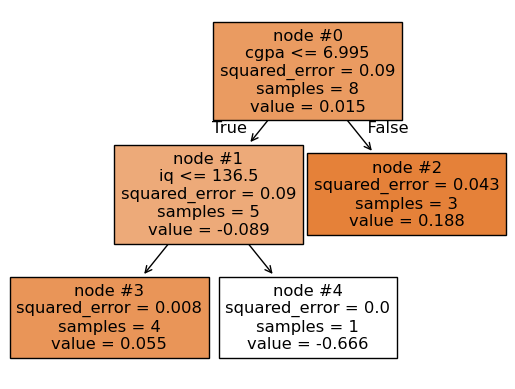

In [21]:

# === visulize the tree ===
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()
# =========================



In [23]:


df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [24]:


def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)



In [25]:


df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)



In [26]:


df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df



,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722


In [27]:


#
# Compare res1 and res2: difference is so much to reduce this learning rate is introduced.
# Then,
# f(x) = f1(x) + lr*f2(x)
#

df['res_final'] = df['is_placed'] - df['pre3(probability)']
df[['res1','res2','res_final']]


,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
